# k Nearest Neighbor Classifier

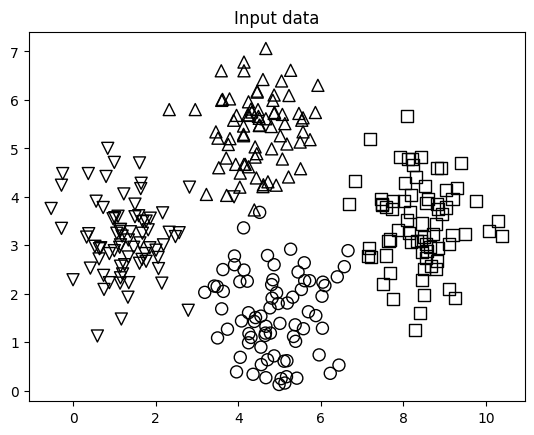

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from sklearn import neighbors, datasets 
%matplotlib inline

input_file = 'data.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1].astype(int) 

plt.figure() 
plt.title('Input data') 
marker_shapes = 'v^os' 

for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                s=75, edgecolors='black', facecolors='none') 
plt.show()

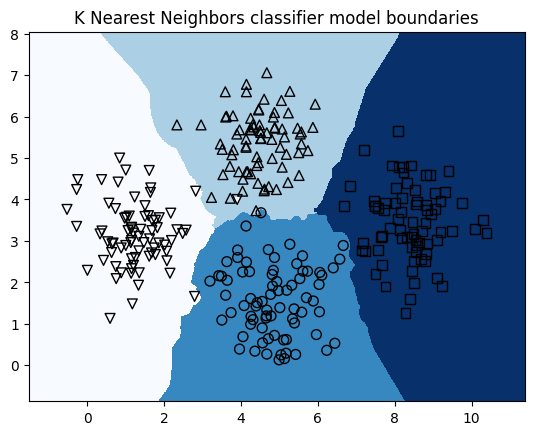

In [11]:
num_neighbors = 5 

classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance') 
classifier.fit(X, y) 

step_size = 0.01  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                 np.arange(y_min, y_max, step_size)) 

output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

output = output.reshape(x_values.shape) 
plt.figure() 
plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues) 

for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                s=50, edgecolors='black', facecolors='none') 

plt.xlim(x_values.min(), x_values.max()) 
plt.ylim(y_values.min(), y_values.max()) 
plt.title('K Nearest Neighbors classifier model boundaries') 
plt.show()

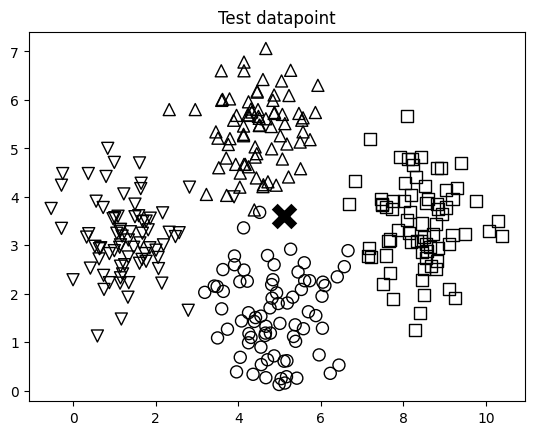

In [12]:
test_datapoint = [5.1, 3.6] 
plt.figure() 
plt.title('Test datapoint') 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                s=75, edgecolors='black', facecolors='none') 

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
            linewidth=6, s=200, facecolors='black') 
plt.show()

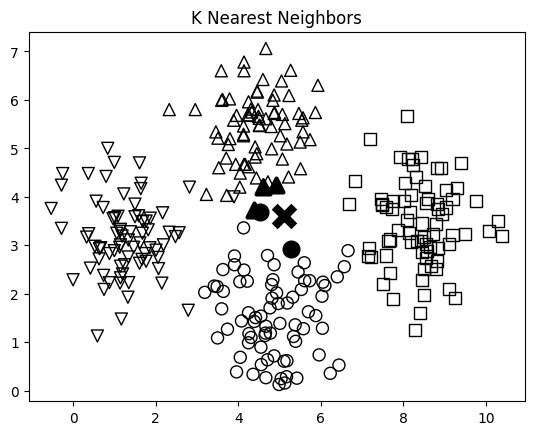

In [13]:
_, indices = classifier.kneighbors([test_datapoint]) 
indices = indices.astype(int)[0] 

plt.figure() 
plt.title('K Nearest Neighbors') 

for i in indices: 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                linewidth=3, s=100, facecolors='black') 
    
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
            linewidth=6, s=200, facecolors='black') 

for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                s=75, edgecolors='black', facecolors='none') 
plt.show() 

In [14]:
print('K-Nearest Neighbours:')
for i in indices: 
    print('({},{}) -> {}'.format(X[i, 0], X[i, 1], y[i]))

print("Predicted output:", classifier.predict([test_datapoint])[0]) 

K-Nearest Neighbours:
(4.52,3.68) -> 2
(4.92,4.24) -> 1
(5.27,2.92) -> 2
(4.39,3.73) -> 1
(4.6,4.21) -> 1
Predicted output: 1
